<a href="https://colab.research.google.com/github/filawt/Quantitative_Strategies/blob/main/11-6_Trading_Journal_Overview_of_Quantitative_Strategies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mean Reversion -  (Pairs Trading)
- Long Pair: Long stock A and short stock B
- Short Pair: Short stock A and long stock B
- You want to find a high correlation between stock A and B's price (usually > 0.8) --  in this case let's say 0.9. If you find a relationship suggesting that the prices move in opposite directions, you can capitalize on this behavior. ONCE the assets deviate from their typical correlation, say 0.5, you can long/short the pair since you expect the correlation to converge back to its original form.
- Sort of becomes an art when you try to maximize the spread between the assets

![image info](SP.png)

# Basic Idea
- 1) Find 2 assets that move similarly with eachother (whether it be a negative or positive correlation)
- 2) Sell the 'overvalued' stock and buy the 'undervalued' stock
-- A common signal to use to triger the purchase of a pair trade is to use the Price Ratio (Stock A / Stock B). If the ratio changes significantly, then you know it is time to trade. 'Significance' can be measured with standard deviation.

# (Link in the descriptions)
![image info](Monte_Pic.PNG)

In [20]:
# Getting Data from 6 years back
# I will use the most recent 1 year to determine how well I would have done if I follow the efficient frontier.
# The market is open 252 times in a given year.
# I will get the adjusted close as my main data.

'''========================================================================= UPDATE 10/27/2021 ================================
MAKE SURE pandas == 1.2 version.
Yahoo has changed their structure when it comes to querying data. I have made the adjustments to this entire notebook.
========================================================================= UPDATE 10/27/2021  ==================================
'''
#!pip install yfinance
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf

def get_historical_Data(tickers):
    """This function returns a pd dataframe with all of the adjusted closing information"""
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        data = pd.concat([data, pd.DataFrame(yf.download(i, start=datetime(2020, 10, 27), end=datetime(2021, 10, 27)).iloc[:,4])], axis = 1)
        names.append(i)
    data.columns = names
    return data

ticks = ["DPZ", "AAPL", "GOOG", "AMD", "GME", "SPY", "NFLX", "BA", "WMT","TWTR","GS","XOM","NKE","BRK-B", "MSFT"] #Name of company (Dominos pizza)
d = get_historical_Data(ticks)
print(d.shape)
# Most Recent Data
d.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,DPZ,AAPL,GOOG,AMD,GME,SPY,NFLX,BA,WMT,TWTR,GS,XOM,NKE,BRK-B,MSFT
Date,,,,,,,,,,,,,,,
2021-10-20,453.726410,148.182465,142.414993,116.389999,46.130001,445.666168,625.140015,216.169998,143.703751,65.800003,397.911652,61.087139,156.964752,287.489990,304.856781
2021-10-21,463.007111,148.400879,142.780502,119.330002,45.427502,446.828552,653.159973,214.339996,144.501022,65.400002,397.618958,59.977329,160.659805,286.820007,308.178986
2021-10-22,459.415527,147.616577,138.625000,119.820000,42.450001,446.365601,664.780029,212.970001,146.006973,62.240002,404.184326,60.388725,161.947617,289.239990,306.592285
2021-10-25,461.305328,147.566940,138.772995,122.360001,43.492500,448.759338,671.659973,212.869995,147.699905,62.110001,404.603790,61.565502,162.680679,290.260010,305.570831
2021-10-26,460.850189,148.242035,139.671997,122.930000,44.459999,449.163239,668.520020,209.809998,146.410507,61.430000,407.393829,62.991028,162.254700,290.850006,307.534363


In [21]:
corr_matrix = d.corr()
corr_matrix

,DPZ,AAPL,GOOG,AMD,GME,SPY,NFLX,BA,WMT,TWTR,GS,XOM,NKE,BRK-B,MSFT
DPZ,1.000000,0.818148,0.874797,0.665388,0.469130,0.834557,0.372663,0.080836,0.407599,0.336258,0.724772,0.497005,0.812071,0.715105,0.872942
AAPL,0.818148,1.000000,0.817185,0.788684,0.430274,0.832325,0.659199,0.095350,0.373089,0.490575,0.729216,0.498231,0.862453,0.608197,0.886737
GOOG,0.874797,0.817185,1.000000,0.572945,0.717871,0.978253,0.542024,0.332867,0.120376,0.604391,0.933673,0.794650,0.729426,0.901955,0.974893
AMD,0.665388,0.788684,0.572945,1.000000,0.076881,0.555607,0.697511,-0.128145,0.555587,0.219452,0.447324,0.182714,0.814614,0.288319,0.681377
GME,0.469130,0.430274,0.717871,0.076881,1.000000,0.737520,0.240664,0.562551,-0.303935,0.553100,0.803210,0.823951,0.303382,0.800656,0.647865
SPY,0.834557,0.832325,0.978253,0.555607,0.737520,1.000000,0.532301,0.442483,0.118445,0.630425,0.964367,0.844584,0.731238,0.932636,0.955292
NFLX,0.372663,0.659199,0.542024,0.697511,0.240664,0.532301,1.000000,-0.031222,0.105738,0.386304,0.480084,0.369577,0.502257,0.301593,0.651469
BA,0.080836,0.095350,0.332867,-0.128145,0.562551,0.442483,-0.031222,1.000000,-0.313237,0.534617,0.510482,0.671750,0.079400,0.568068,0.229572
WMT,0.407599,0.373089,0.120376,0.555587,-0.303935,0.118445,0.105738,-0.313237,1.000000,-0.395426,-0.044592,-0.326004,0.399258,-0.007303,0.187105
TWTR,0.336258,0.490575,0.604391,0.219452,0.553100,0.630425,0.386304,0.534617,-0.395426,1.000000,0.666863,0.704388,0.464564,0.564449,0.600566


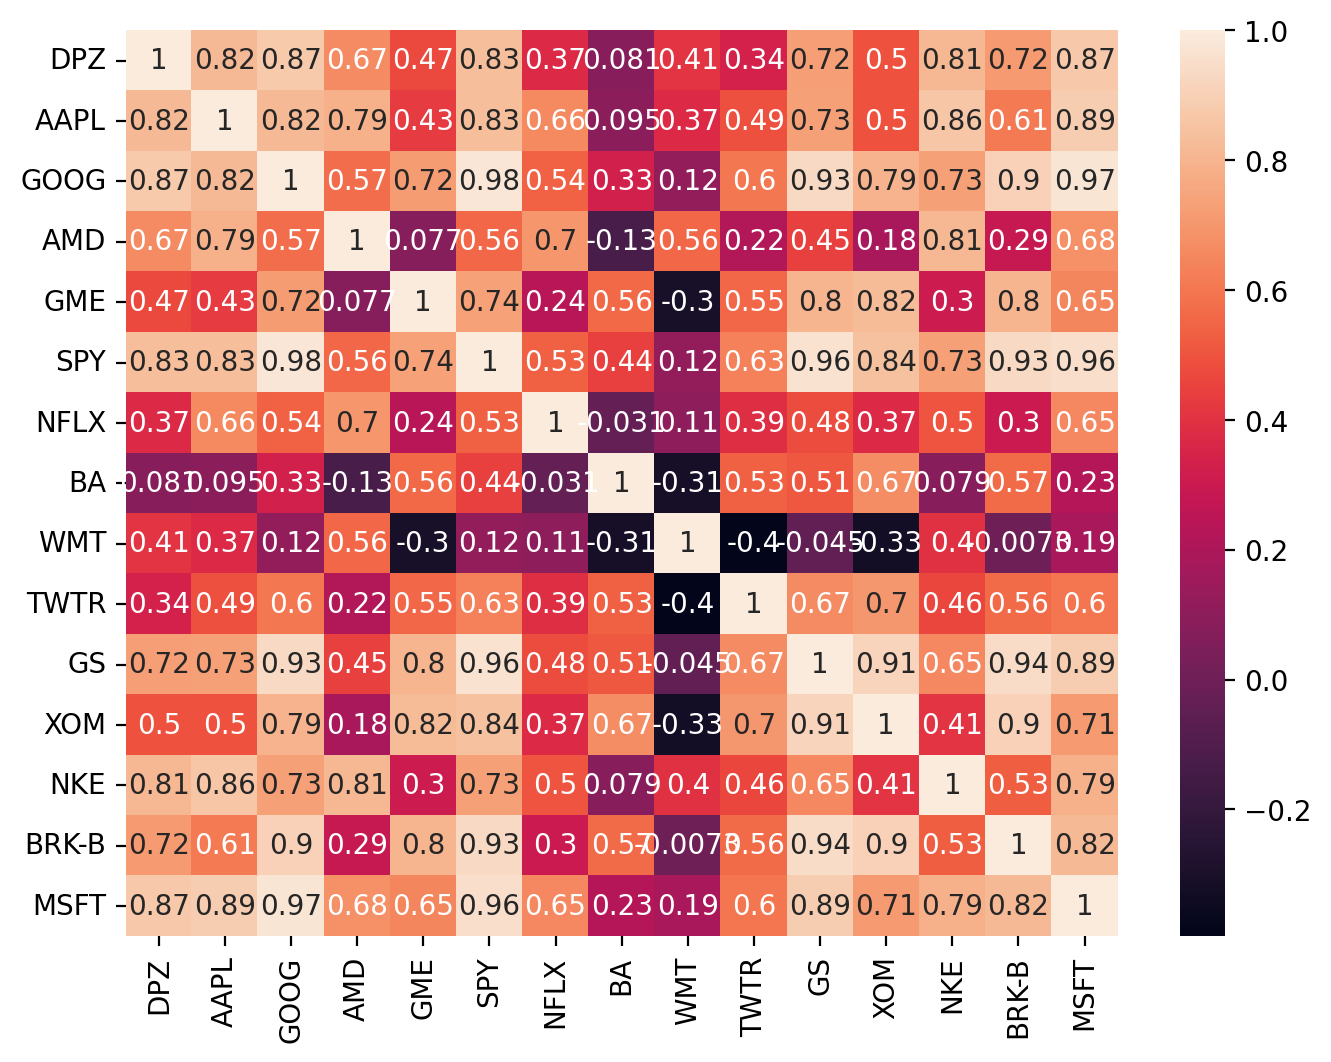

In [22]:
# Let's heatmap this matrix so that we can have a better sense of what is going on
import seaborn as sn
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=200)
sn.heatmap(corr_matrix, annot = True)

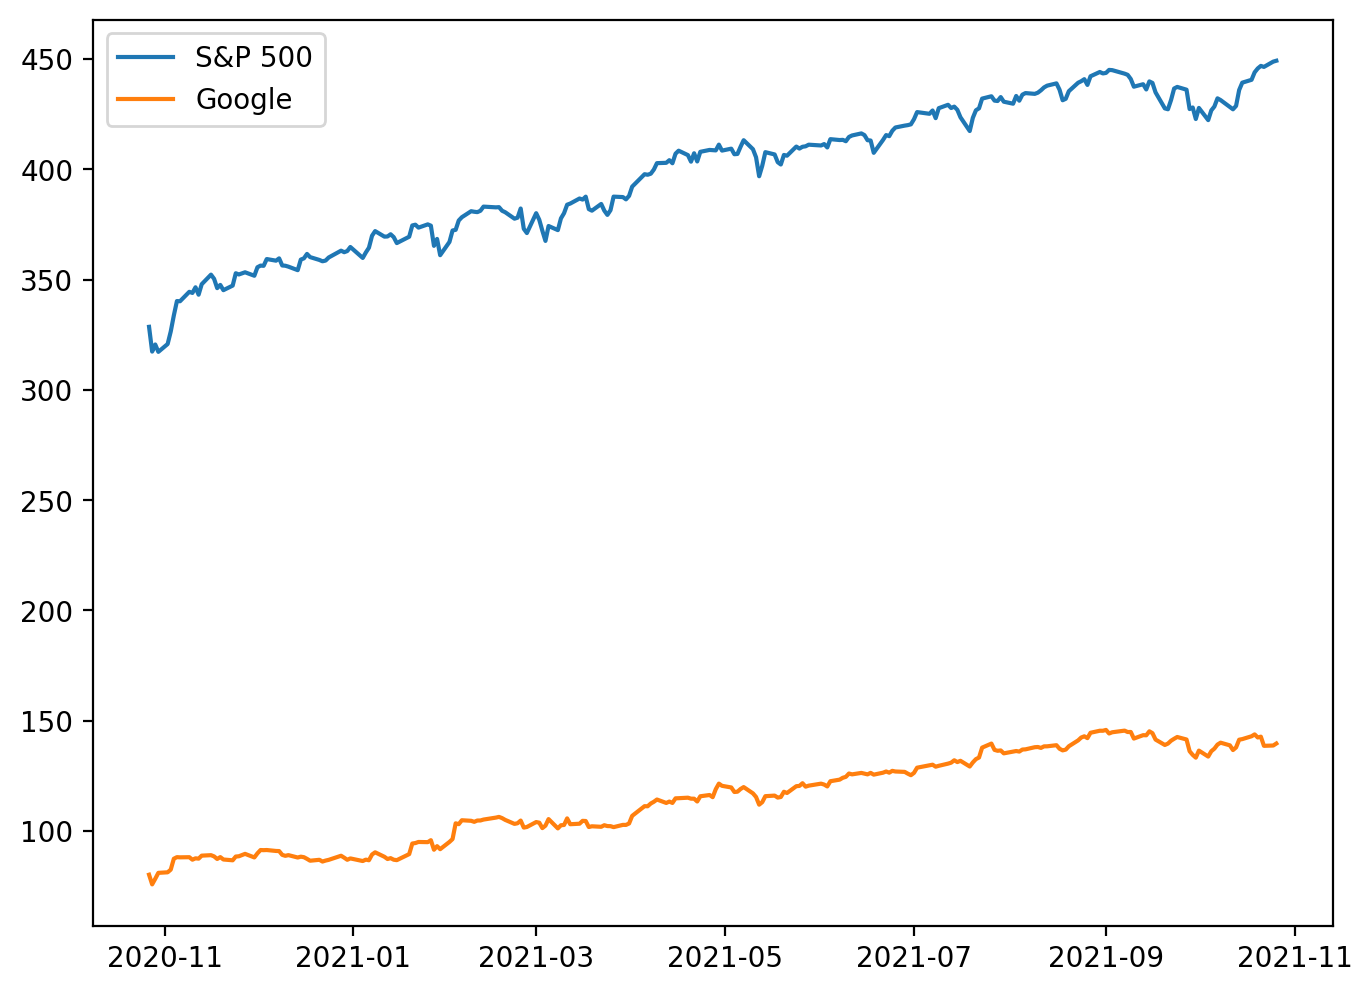

In [36]:
import matplotlib.pyplot as plt
figure(figsize=(8, 6), dpi=200)
SPY = d['SPY'] # S&P 500
GOOG = d['GOOG'] # Berkshire Class A share
# HOWEVER, let's check out the relationship between the stocks...
plt.plot(SPY, label = "S&P 500")
plt.plot(GOOG, label = "Google")
plt.legend()
# oh... that's why the correlation seem very high. The data are not 'standardized.'
# Let's look at a different one...

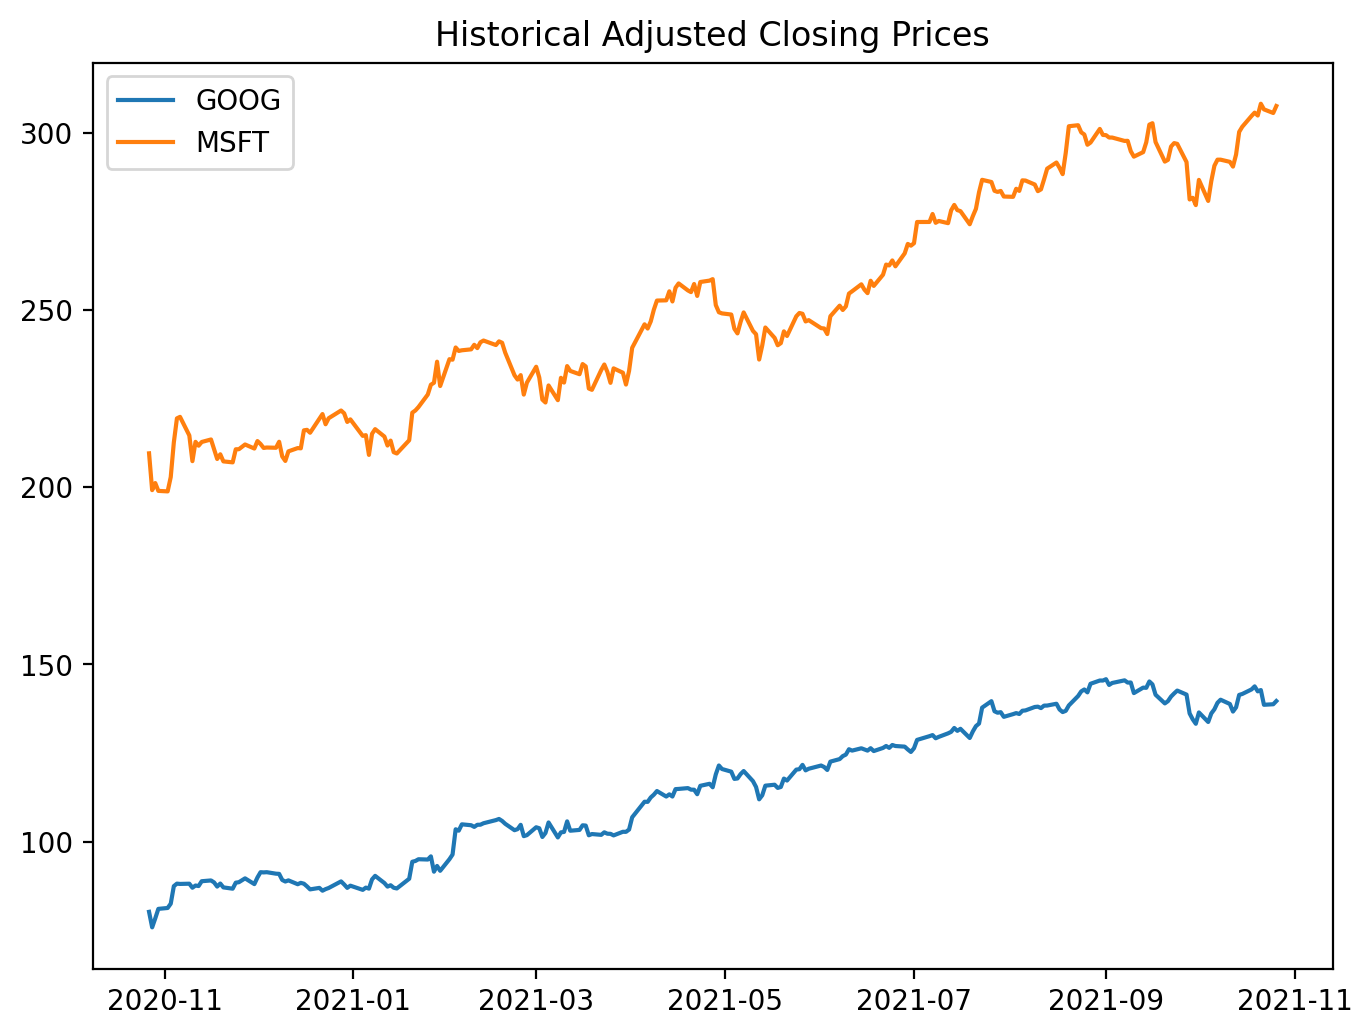

In [37]:
# Correlation of Nike and Apple ~ 0.89.
figure(figsize=(8, 6), dpi=200)
GOOG = d['GOOG']
MSFT = d['MSFT']
plt.plot(GOOG, label = "GOOG")
plt.plot(MSFT, label = "MSFT")
plt.title('Historical Adjusted Closing Prices')
plt.legend()
# More reasonable.

Text(0.5, 1.0, 'Spread between NIKE and AAPL')

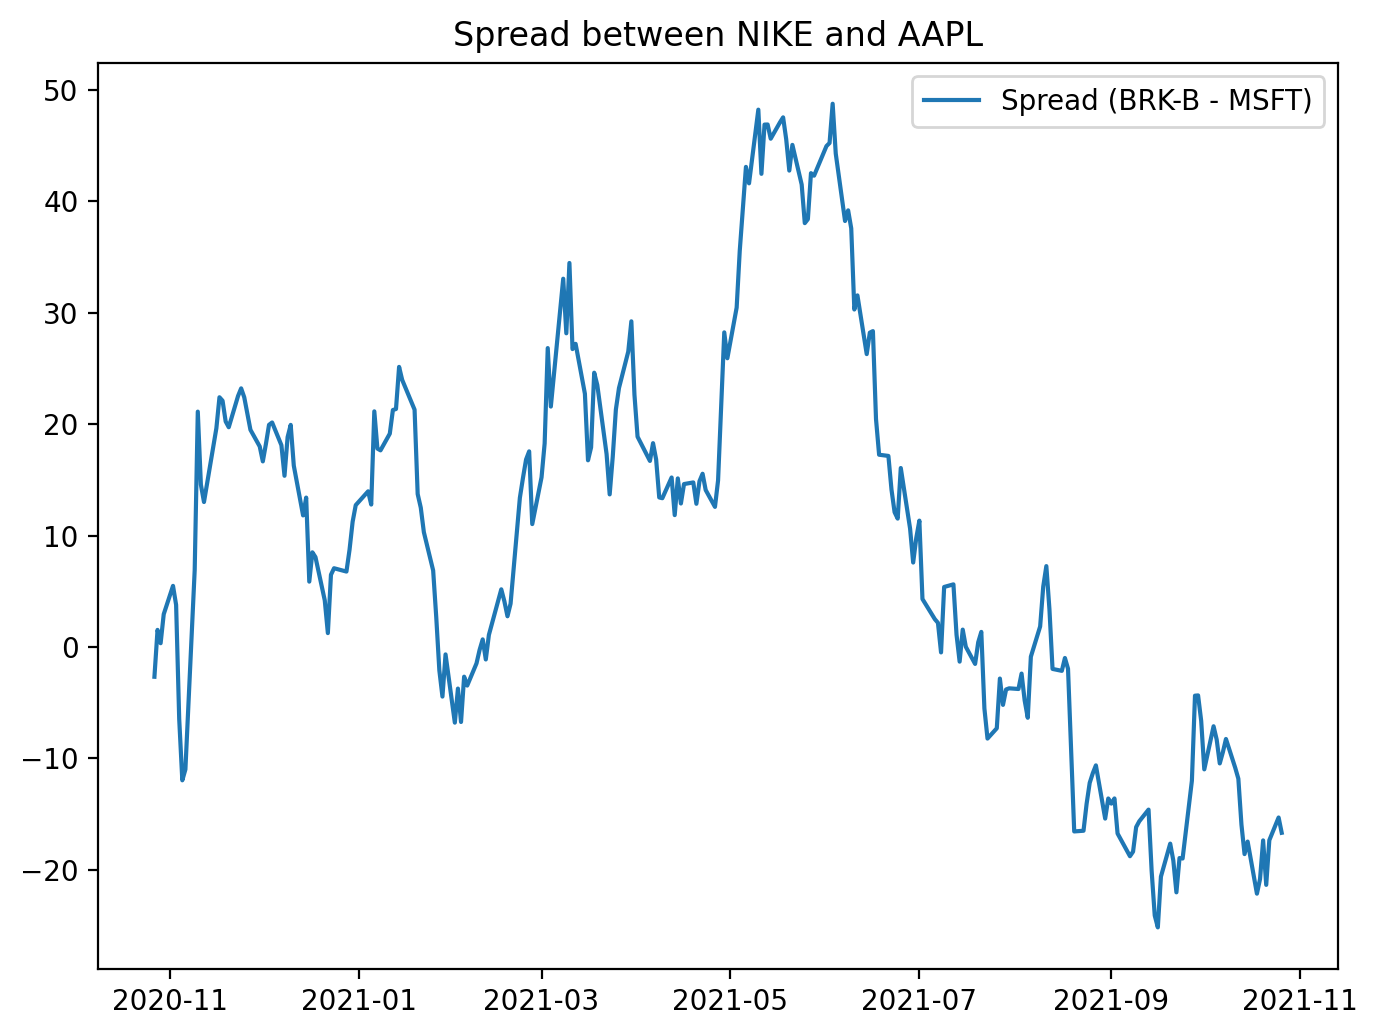

In [25]:
# plot the spread
figure(figsize=(8, 6), dpi=200)
plt.plot(BRK_B - MSFT, label = 'Spread (BRK-B - MSFT)')
plt.legend()
plt.title("Spread between NIKE and AAPL")

In [26]:
# Check out the cointegration value: Null hyp. = no cointegration
import statsmodels.tsa.stattools as ts 
result = ts.coint(BRK_B, MSFT)

In [27]:
# Cointegration test: A technique used to find a potential correlation in a time series (long term)
# Determines if the spread between the two assets are constant over time.
# Null Hypothesis: Spread between series are non-stationary.
# Uses the augmented Engle-Granger two-step cointegration test.
cointegration_t_statistic = result[0]
p_val = result[1]
critical_values_test_statistic_at_1_5_10 = result[2]
print('We want the P val < 0.05 (meaning that cointegration exists)')
print('P value for the augmented Engle-Granger two-step cointegration test is', p_val)

We want the P val < 0.05 (meaning that cointegration exists)
P value for the augmented Engle-Granger two-step cointegration test is 0.42666748113568054


In [28]:
from statsmodels.tsa.stattools import adfuller
# Compute the ADF test for Berkshire Hathaway and Microsoft
# With all time series, you want to have stationary data otherwise our data will be very hard to predict.
# ADF for Berkshire Hathaway Class B
BRK_B_ADF = adfuller(BRK_B)
print('P value for the Augmented Dickey-Fuller Test is', BRK_B_ADF[1])
MSFT_ADF = adfuller(MSFT)
print('P value for the Augmented Dickey-Fuller Test is', MSFT_ADF[1])
Spread_ADF = adfuller(BRK_B - MSFT)
print('P value for the Augmented Dickey-Fuller Test is', Spread_ADF[1])
Ratio_ADF = adfuller(BRK_B / MSFT)
print('P value for the Augmented Dickey-Fuller Test is', Ratio_ADF[1])
# Spread looks fine. If you'd want even better results, consider taking the difference (order 1) of Berkshire and MSFT

# Results: can only claim stationary for the spread (since P value < 0.05). This suggests a constant mean over time.
# Therefore, the two series are cointegrated.

P value for the Augmented Dickey-Fuller Test is 0.3736745954764997
P value for the Augmented Dickey-Fuller Test is 0.913253147743716
P value for the Augmented Dickey-Fuller Test is 0.5579982312324822
P value for the Augmented Dickey-Fuller Test is 0.4440166067045985


Text(0.5, 1.0, 'Price Ratio between BRK and MSFT')

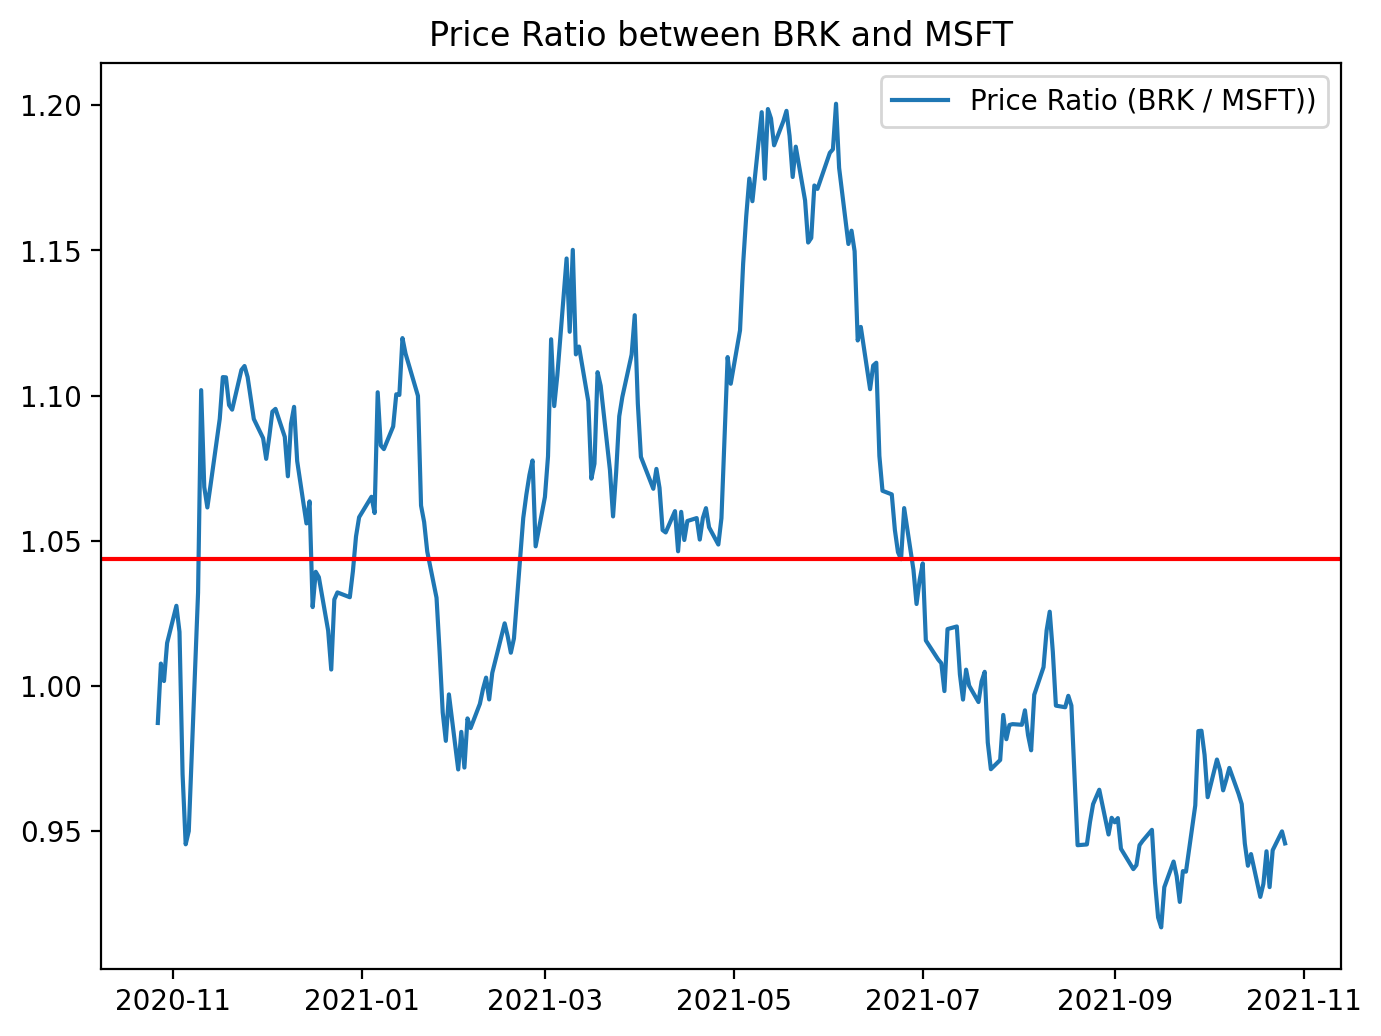

In [29]:
# Also, we can take a look at the price ratios between the two time series.
figure(figsize=(8, 6), dpi=200)
ratio = BRK_B / MSFT
plt.plot(ratio, label = 'Price Ratio (BRK / MSFT))')
plt.axhline(ratio.mean(), color='red')
plt.legend()
plt.title("Price Ratio between BRK and MSFT")

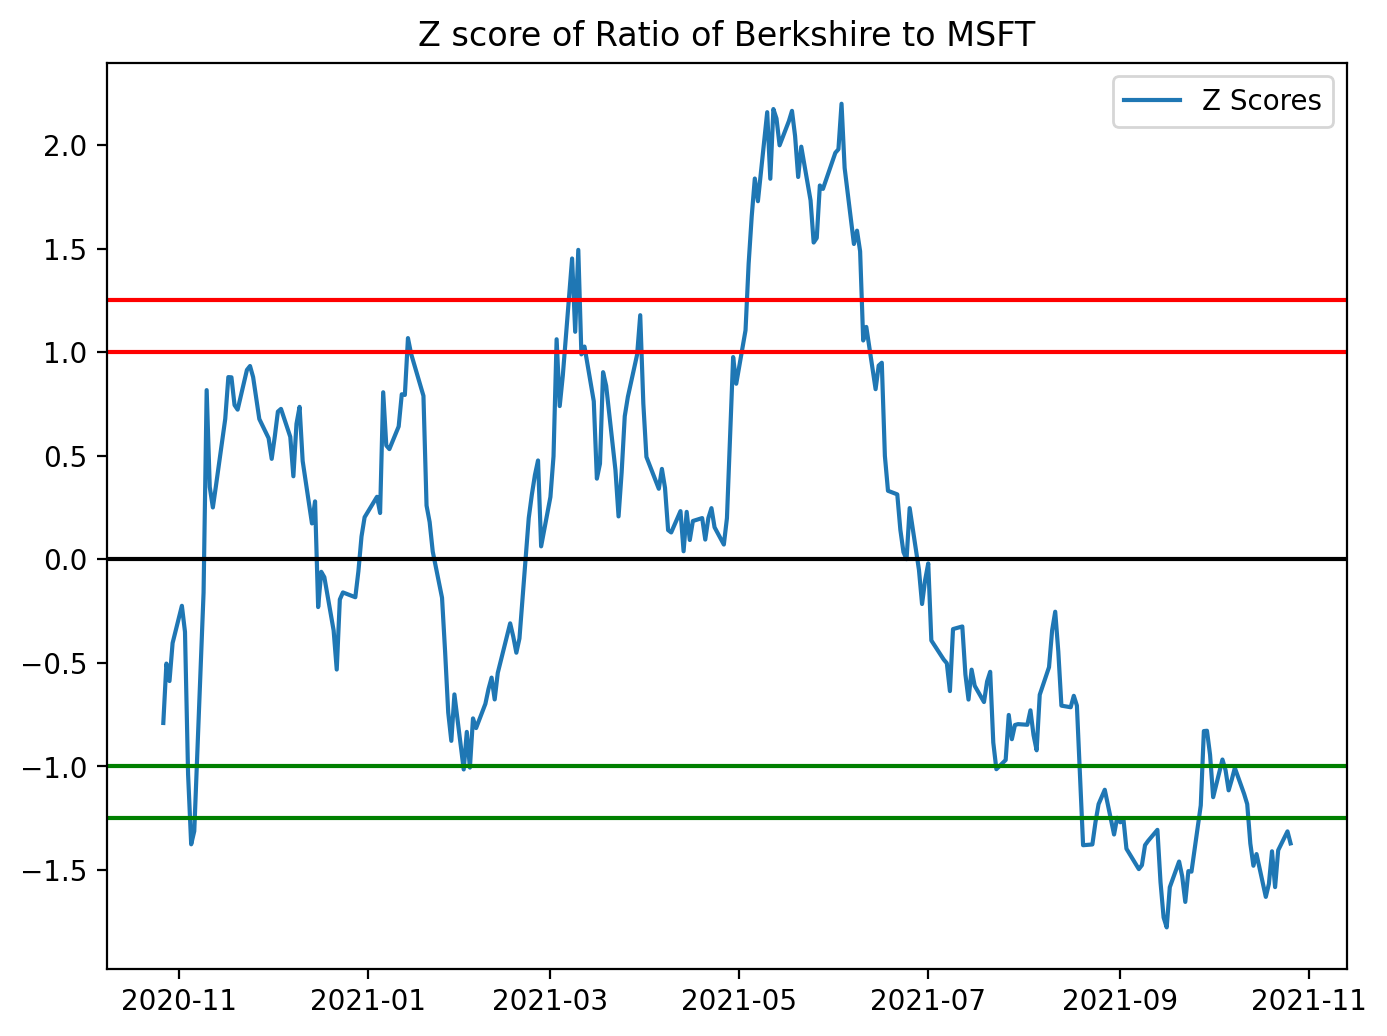

In [30]:
# NOTE, here you can either use the spread OR the Price ratio approach. Anyways, let's standardize the ratio so we can have a 
# upper and lower bound to help evaluate our trends.. Let's stick with the ratio data.
figure(figsize=(8, 6), dpi=200)
# Calculate the Zscores of each row.
df_zscore = (ratio - ratio.mean())/ratio.std()
plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red') # Setting the upper and lower bounds to be the z score of 1 and -1 (1/-1 standard deviation)
plt.axhline(1.25, color='red') # 95% of our data will lie between these bounds.
plt.axhline(-1.0, color='green') # 68% of our data will lie between these bounds.
plt.axhline(-1.25, color='green') # 95% of our data will lie between these bounds.
plt.legend(loc = 'best')
plt.title('Z score of Ratio of Berkshire to MSFT')
plt.show()
# For the most part, the range that exists outside of these 'bands' must come converge back to the mean. Thus, you can 
# determine when you can go long or short the pair (BRK_B to MSFT).

In [31]:
# That's cool.. so when do we actually start trading? We need some form of 'signal' to trade (and to trade)
# This is where it can become an 'artform' AND a probability game.

In [32]:
# You could split 80 / 20 for train and test, BUT we are not going to be backtesting since we are just going over the model.
# train = ratio[0:round(0.8*len(ratio))]
# test = ratio[round(0.8*len(ratio)):]
# print('Do the splits check out?',len(train) + len(test) == len(ratio))

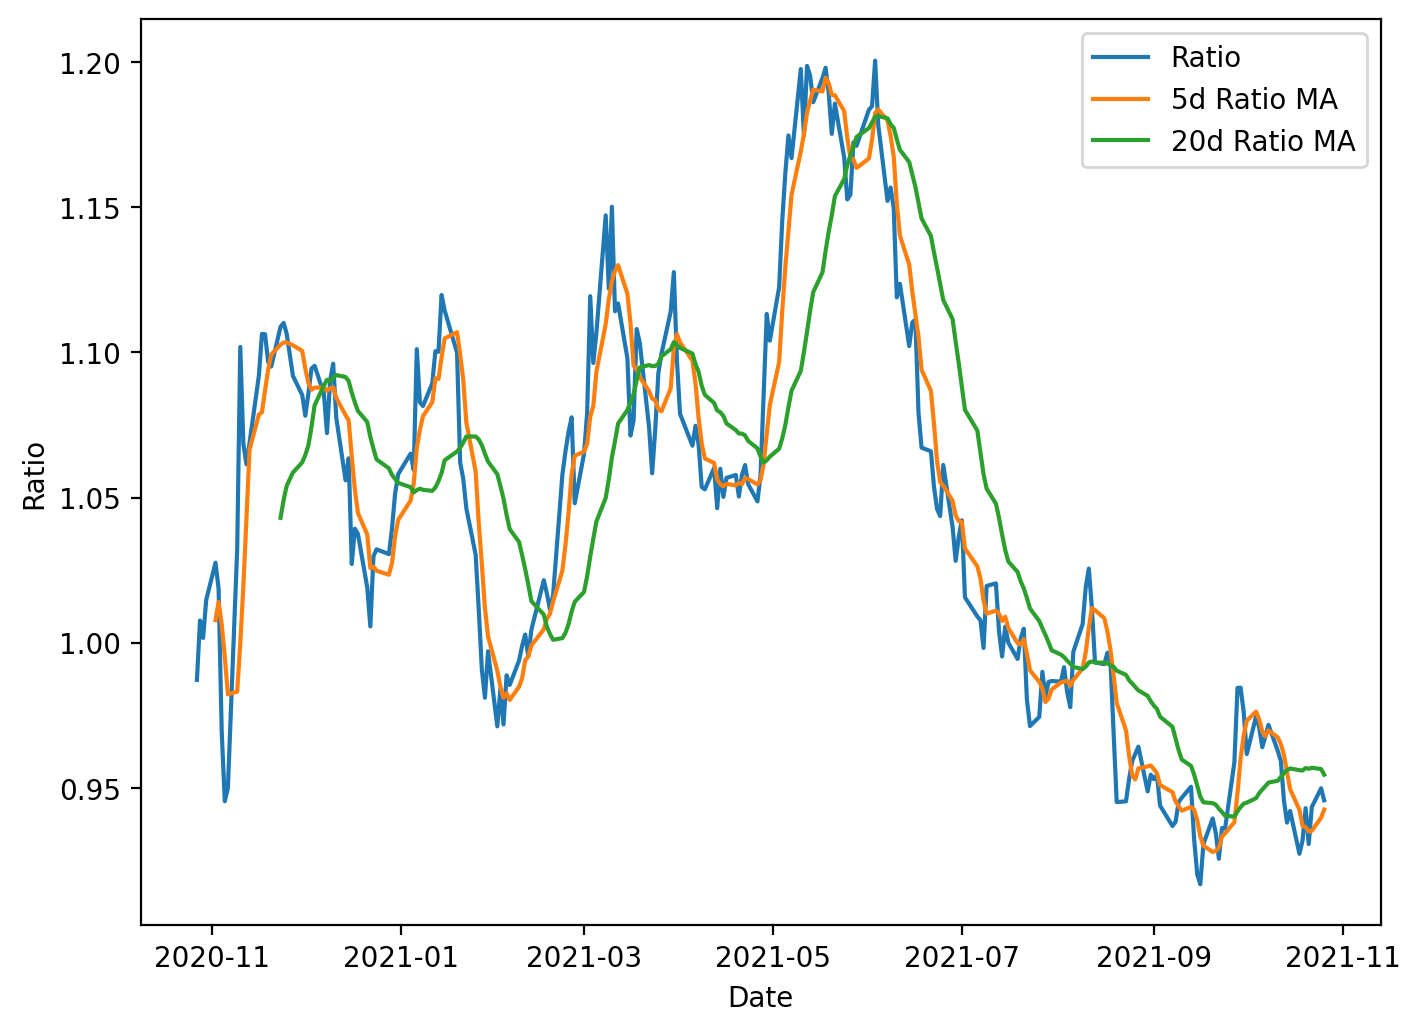

In [33]:
figure(figsize=(8, 6), dpi=200)
ratios_mavg5 = ratio.rolling(window=5, center=False).mean()
ratios_mavg20 = ratio.rolling(window=20, center=False).mean()
std_20 = ratio.rolling(window=20, center=False).std()
zscore_20_5 = (ratios_mavg5 - ratios_mavg20)/std_20
plt.plot(ratio.index, ratio.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg20.index, ratios_mavg20.values)
plt.legend(['Ratio', '5d Ratio MA', '20d Ratio MA'])
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.show()

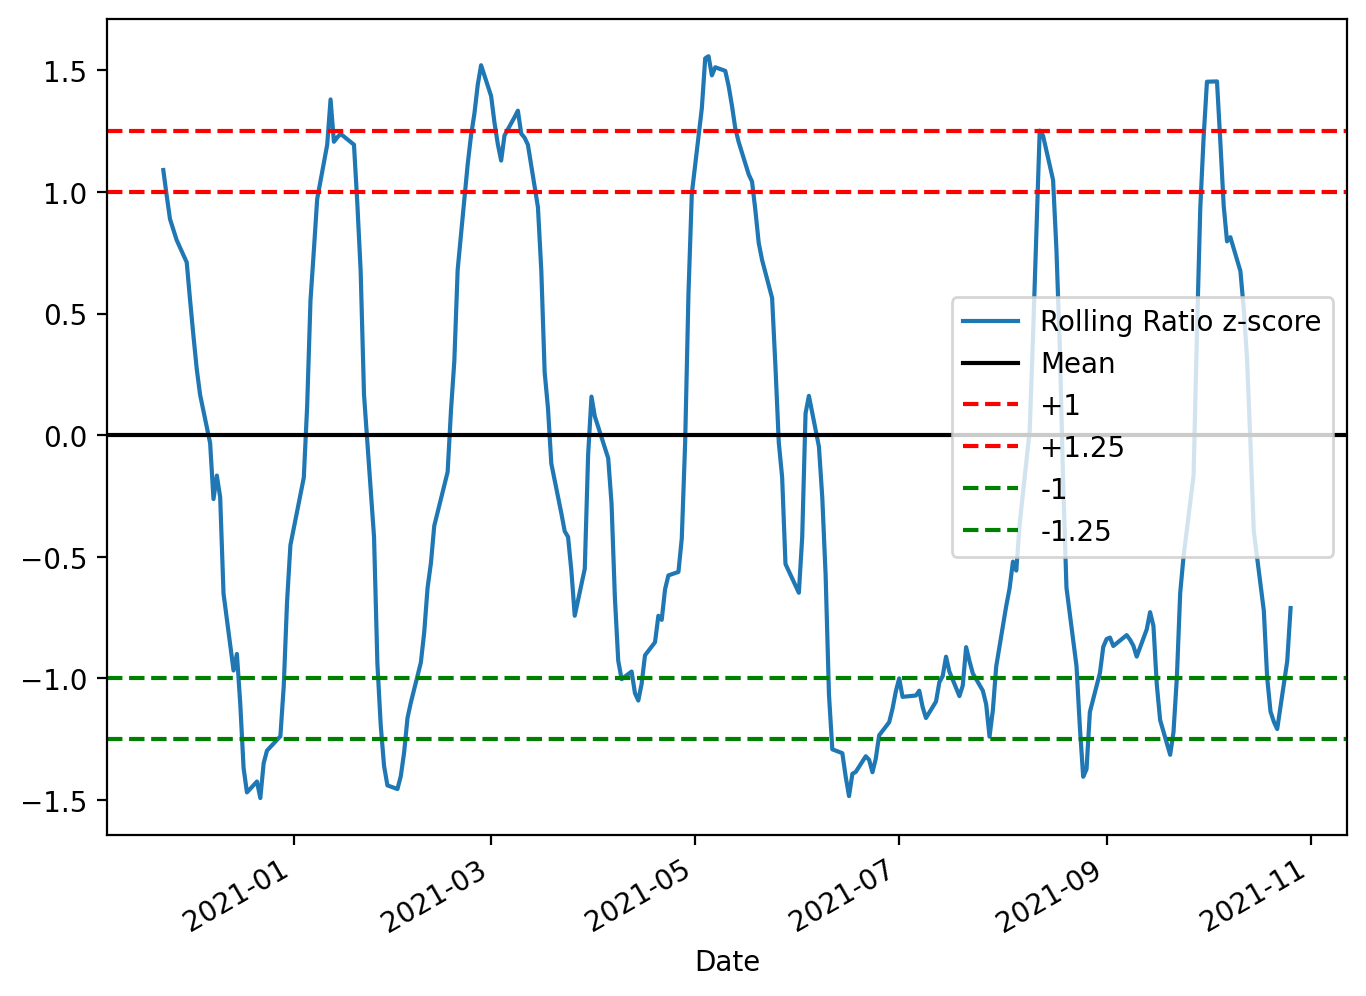

In [34]:
figure(figsize=(8, 6), dpi=200)
zscore_20_5.plot()
plt.axhline(0, color='black')
plt.axhline(1, color='red', linestyle='--')
plt.axhline(1.25, color='red', linestyle='--')
plt.axhline(-1, color='green', linestyle='--')
plt.axhline(-1.25, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-score', 'Mean', '+1','+1.25','-1','-1.25'])
plt.show()

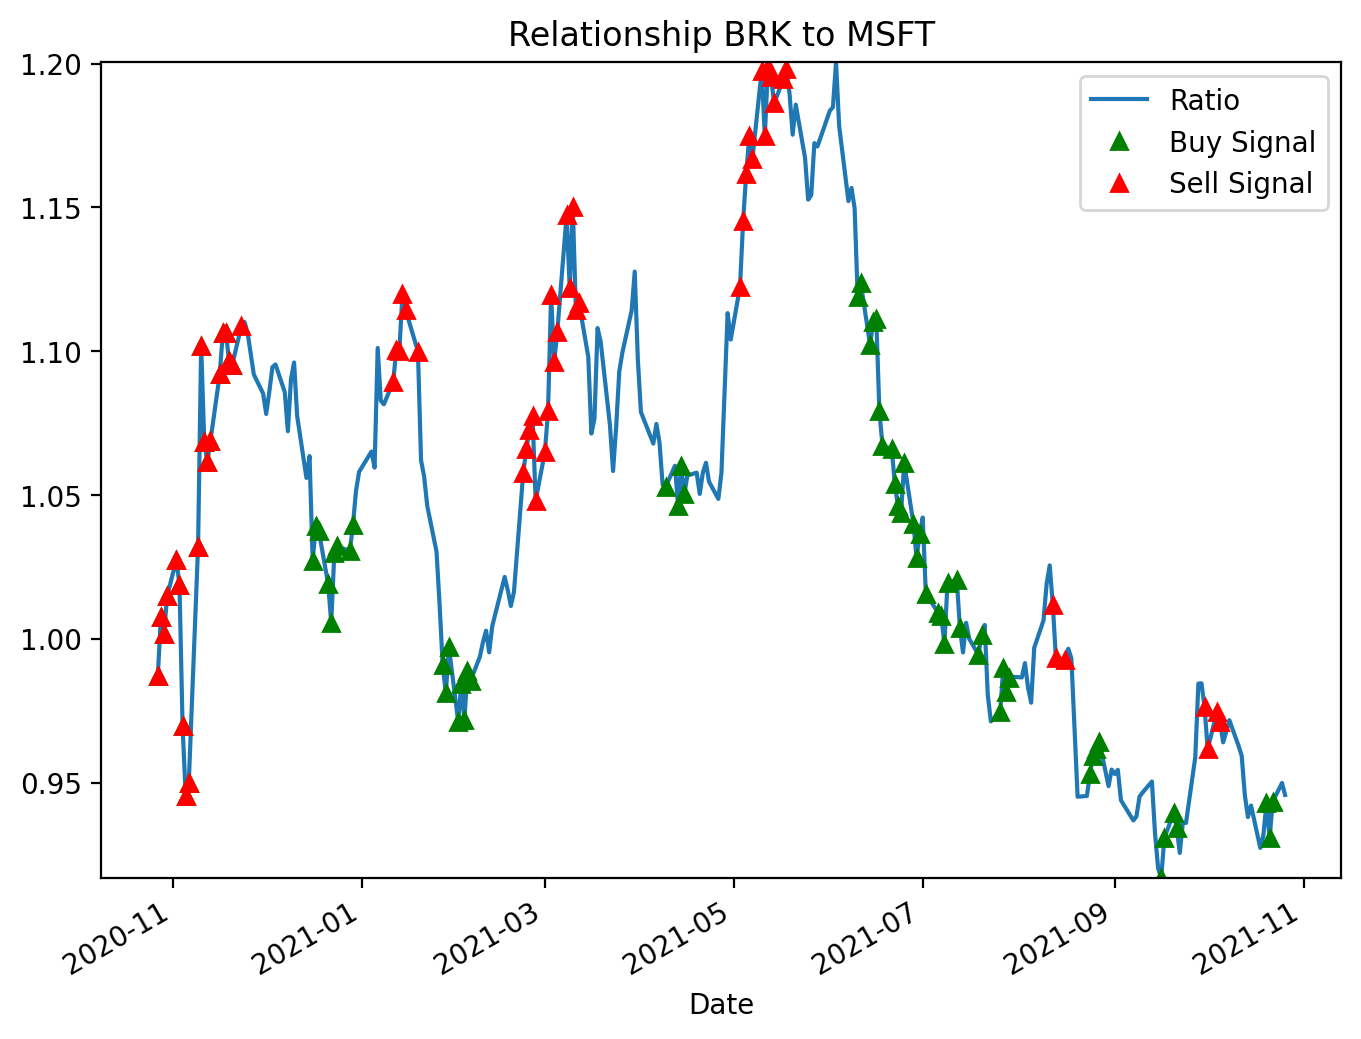

In [35]:
figure(figsize=(8, 6), dpi=200)
ratio.plot()
buy = ratio.copy()
sell = ratio.copy()
buy[zscore_20_5>-1] = 0
sell[zscore_20_5<1] = 0
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio.min(), ratio.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.title('Relationship BRK to MSFT')
plt.show()

# Momentum (Trends are your friends)

# Valuation (Buy low, sell high)

# Sentiment (Buy the rumor, sell the news)

# Seasonality (Sell in May and go away)